# Final assigment Noah Klein Wolterink

## 1. Scope of research

My research was initially inspired by this video from Vox called: 'How America's hottest city is trying to cool down' (Vox). This made me curious to analyze how data can be used in an applicable way to ultimately give recommendations to solve issues in urban aras.

I chose to specifically look at the city of El Paso, Texas because this is one of the hottest and sunniest cities in the United States. I became interested in how making a weather prediction could eventually help solve some of the problems that come as a result of the climate in this area.

## 2. Data gathered

To get started with cleaning the data, I had to retrieve data I wanted to use from somewhere. After some thorough research on the internet I found the website of the The National Climatic Data Center's (NCDC) that had sufficient data of the subject I wanted to make a predictive model of the variable 'Average temperature'. I continued by downloading the file as a comma-separated values (CSV) file.

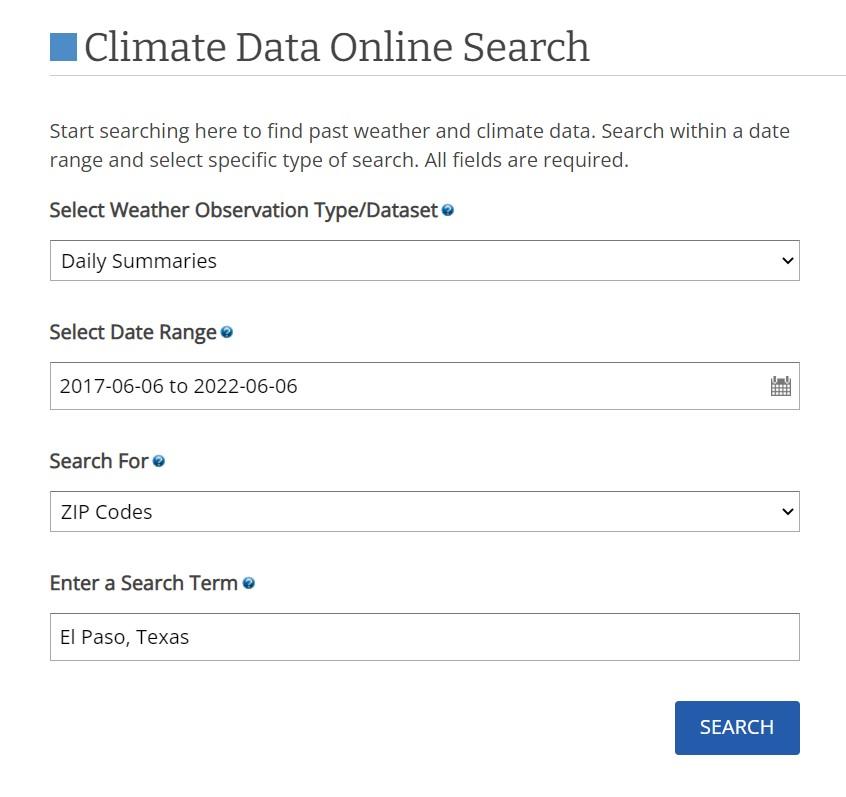

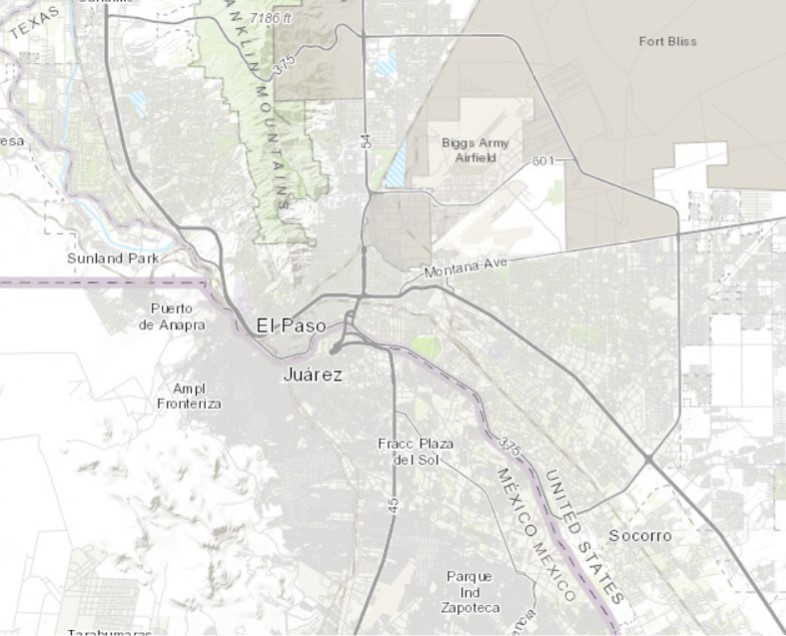

The dataset originally consisted of 26548 rows however after finding out that only one location contained sufficient data for me to work with, there were 1826 left. My predictive model is meant to give an insight on how these variables can play a role in correctly predicting the variable 'Average temperature Celcius'. Ultimately, I wanted to predict this variable for not only 1, but several coordinates across the city. I wanted to make a recommendation based on these predictions on where in the city there should be given more attention to the temperature.

## 3. Data cleaning

In [210]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import matplotlib as mlt
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
%matplotlib inline
from sklearn import datasets
from sklearn.metrics import mean_squared_error

### 3.1 Explorting the dataset

In [211]:
df = pd.read_csv('2995453.csv', sep=',')
df.head(4000)

,STATION,NAME,DATE,AWND,DAPR,MDPR,PGTM,PRCP,TAVG,TMAX,...,WDF5,WSF2,WSF5,WT01,WT02,WT03,WT04,WT05,WT07,WT08
0,USW00023044,"EL PASO INTERNATIONAL AIRPORT, TX US",2017-06-06,8.28,NaN,NaN,NaN,0.00,87.0,98.0,...,80.0,25.1,33.1,NaN,NaN,1.0,NaN,NaN,NaN,NaN
1,USW00023044,"EL PASO INTERNATIONAL AIRPORT, TX US",2017-06-07,8.05,NaN,NaN,NaN,0.16,80.0,94.0,...,340.0,36.9,42.9,NaN,NaN,1.0,NaN,NaN,NaN,1.0
2,USW00023044,"EL PASO INTERNATIONAL AIRPORT, TX US",2017-06-08,6.93,NaN,NaN,NaN,0.00,80.0,95.0,...,250.0,25.1,30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,USW00023044,"EL PASO INTERNATIONAL AIRPORT, TX US",2017-06-09,6.93,NaN,NaN,NaN,0.00,87.0,100.0,...,250.0,21.9,25.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,USW00023044,"EL PASO INTERNATIONAL AIRPORT, TX US",2017-06-10,12.53,NaN,NaN,NaN,0.00,91.0,101.0,...,250.0,23.9,29.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,US1TXEP0047,"FMSP MCKELLIGON, TX US",2018-05-21,NaN,NaN,NaN,NaN,0.00,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3996,US1TXEP0047,"FMSP MCKELLIGON, TX US",2018-05-22,NaN,NaN,NaN,NaN,1.34,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3997,US1TXEP0047,"FMSP MCKELLIGON, TX US",2018-05-23,NaN,NaN,NaN,NaN,0.00,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3998,US1TXEP0047,"FMSP MCKELLIGON, TX US",2018-05-24,NaN,NaN,NaN,NaN,0.00,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


This is the dataset at first glance, as can be seen there are a lot of containing 'NaN' variables. Furthermore, I chose to view to take the head of the first 4000 rows because I wanted to see if multiple locations contain variables that I can use for my research. As shows, FMSP MCKELLIGON, TX US, short for; Franklin Mountains State Park, El Paso, Texas, does not contain enough variables to make a predictive model with.

### 3.2 Cleaning the dataset

In [212]:
df = df.loc[df['NAME'] == 'EL PASO INTERNATIONAL AIRPORT, TX US']
df = df[['NAME', 'DATE', 'AWND', 'TAVG', 'TMAX', 'TMIN', 'WDF2', 'WDF5', 'WSF2', 'WSF5']]

I first selected the rows that contained data from El Paso International Airport. The reason for this is that only this zip code contains data that I can use to make a predictive model with.

I found a file on the NCDC website that contained the the meaning of the codes. Therefore I was able to understand what every variable stands for (NCDC). I also chose variables I wanted to continue my research with. I specifically chose these variables because the other ones did have enough data for me to use. 

In [213]:
df.rename(columns = {'AWND':'Average wind speed', 'TAVG':'Average temperature', 'TMAX':'Maximum temperature', 'TMIN':'Minimum temperature', 'WDF2':'Direction of fastest 2-minute wind (Degrees)', 'WDF5':'Direction of fastest 5-second wind (degrees)', 'WSF2':'Fastest 2-minute wind speed', 'WSF5':'Fastest 5-second wind speed'}, inplace = True)

I changed the variables with specific code names for their variables and made them easier to understand. Basically by changing abbreviations back to their full names and for WDF and WSF using the NCDC document.

In [214]:
df = df.fillna(0)

I continued to fill all NA values with 0, so that they could be used during further research.

### 3.3 Converting Fahrenheit to Celcius degrees and Mph (Miles per Hour) to Mps (Meters per Second)

In [215]:
def fahr_to_celsius(temp_fahr):
    """Convert Fahrenheit to Celsius
    
    Return Celsius conversion of input"""
    temp_celsius = (temp_fahr - 32) * 5 / 9
    return temp_celsius

fahr_to_celsius(df["Average temperature"])

df["Average temperature Celcius"] = fahr_to_celsius(df["Average temperature"]) #Average temperature in Celcius degrees

df["Maximum temperature Celcius"] = fahr_to_celsius(df["Maximum temperature"]) #Minimum temperature in Celcius degrees

df["Minimum temperature Celcius"] = fahr_to_celsius(df["Minimum temperature"]) #Maximum temperature in Celcius degrees

In [216]:
def mph_to_mps(mph):
    """Convert Mph to Mps
    
    Return Mps conversion of input"""
    mps = (mph * 5280 * .3048 / 60 / 60)
    return mps

df["Average wind speed mps"] = mph_to_mps(df["Average wind speed"]) #Average wind speed in meters per second
df["Fastest 2-minute wind speed mps"] = mph_to_mps(df["Fastest 2-minute wind speed"]) #Fastest 2-minute wind speed in meters per second
df["Fastest 5-second wind speed mps"] = mph_to_mps(df["Fastest 5-second wind speed"]) #Fastest 5-second wind speed in meters per second

I now started converting the values Fahrenheit and Mph (Miles per hour) to values we are more familiar with in the Netherlands (Celcius and meters per second). Luckily, I found a page on Github with all the formulas on how to convert the values (Roooommmmelllll).

In [217]:
df = df[['NAME', 'DATE','Average temperature Celcius', 'Maximum temperature Celcius', 'Minimum temperature Celcius', 'Direction of fastest 2-minute wind (Degrees)', 'Direction of fastest 5-second wind (degrees)', 'Fastest 2-minute wind speed mps', 'Fastest 5-second wind speed mps', 'Average wind speed mps']]
df.head(100)

,NAME,DATE,Average temperature Celcius,Maximum temperature Celcius,Minimum temperature Celcius,Direction of fastest 2-minute wind (Degrees),Direction of fastest 5-second wind (degrees),Fastest 2-minute wind speed mps,Fastest 5-second wind speed mps,Average wind speed mps
0,"EL PASO INTERNATIONAL AIRPORT, TX US",2017-06-06,30.555556,36.666667,23.888889,80.0,80.0,11.220704,14.797024,3.701491
1,"EL PASO INTERNATIONAL AIRPORT, TX US",2017-06-07,26.666667,34.444444,19.444444,340.0,340.0,16.495776,19.178016,3.598672
2,"EL PASO INTERNATIONAL AIRPORT, TX US",2017-06-08,26.666667,35.000000,18.333333,250.0,250.0,11.220704,13.411200,3.097987
3,"EL PASO INTERNATIONAL AIRPORT, TX US",2017-06-09,30.555556,37.777778,23.888889,250.0,250.0,9.790176,11.220704,3.097987
4,"EL PASO INTERNATIONAL AIRPORT, TX US",2017-06-10,32.777778,38.333333,24.444444,250.0,250.0,10.684256,13.008864,5.601411
...,...,...,...,...,...,...,...,...,...,...
95,"EL PASO INTERNATIONAL AIRPORT, TX US",2017-09-09,25.555556,31.111111,20.000000,110.0,100.0,8.091424,9.790176,2.999638
96,"EL PASO INTERNATIONAL AIRPORT, TX US",2017-09-10,25.555556,32.222222,20.000000,100.0,110.0,8.896096,11.220704,3.799840
97,"EL PASO INTERNATIONAL AIRPORT, TX US",2017-09-11,26.666667,33.333333,20.555556,110.0,40.0,5.409184,8.091424,2.101088
98,"EL PASO INTERNATIONAL AIRPORT, TX US",2017-09-12,26.666667,35.000000,16.666667,140.0,220.0,3.978656,5.811520,1.600403


I decided to drop the columns containing the variables that I won't use anymore since I have converted those. These columns are: 'Average temperature', 'Maximum temperature', 'Minimum temperature', 'Average wind speed', 'Fastest 2-minute wind speed' and 'Fastest 5-second wind speed'.

This means that I picked the variables that I thought would have the most impact on predicting the average temperature. My predictive model was now meant to predict the average temperature based on the variables: Maximum temperature Celcius, Minimum temperature Celcius, Direction of fastest 2-minute wind (Degrees), Direction of fastest 5-second wind (degrees), Fastest 2-minute wind speed mps, Fastest 5-second wind speed mps, Average wind speed mps, Week day and Month.

I continued by showing the head of the first 100 columns to see if there is something noticable going on.

### 3.4 Implementing weekdays an months by using Datetime

In [218]:
dr = pd.date_range(start='2017-06-06', end='2022-06-04')
df['Date'] = dr

df['Week Day'] = pd.to_datetime(dr).day_name()

df['Month'] = pd.DatetimeIndex(df['Date']).month_name()
df = df[['Average temperature Celcius', 'Maximum temperature Celcius', 'Minimum temperature Celcius', 'Direction of fastest 2-minute wind (Degrees)', 'Direction of fastest 5-second wind (degrees)', 'Fastest 2-minute wind speed mps', 'Fastest 5-second wind speed mps', 'Average wind speed mps', 'Week Day', 'Month']] #Drop date because datetime can't be included

dummies = pd.get_dummies(df[['Month', 'Week Day']])
df = pd.concat([df, dummies], axis=1)

df.drop('Month', axis=1, inplace=True)
df.drop('Week Day', axis=1, inplace=True)

df.head(10)

,Average temperature Celcius,Maximum temperature Celcius,Minimum temperature Celcius,Direction of fastest 2-minute wind (Degrees),Direction of fastest 5-second wind (degrees),Fastest 2-minute wind speed mps,Fastest 5-second wind speed mps,Average wind speed mps,Month_April,Month_August,...,Month_November,Month_October,Month_September,Week Day_Friday,Week Day_Monday,Week Day_Saturday,Week Day_Sunday,Week Day_Thursday,Week Day_Tuesday,Week Day_Wednesday
0,30.555556,36.666667,23.888889,80.0,80.0,11.220704,14.797024,3.701491,0,0,...,0,0,0,0,0,0,0,0,1,0
1,26.666667,34.444444,19.444444,340.0,340.0,16.495776,19.178016,3.598672,0,0,...,0,0,0,0,0,0,0,0,0,1
2,26.666667,35.000000,18.333333,250.0,250.0,11.220704,13.411200,3.097987,0,0,...,0,0,0,0,0,0,0,1,0,0
3,30.555556,37.777778,23.888889,250.0,250.0,9.790176,11.220704,3.097987,0,0,...,0,0,0,1,0,0,0,0,0,0
4,32.777778,38.333333,24.444444,250.0,250.0,10.684256,13.008864,5.601411,0,0,...,0,0,0,0,0,1,0,0,0,0
5,31.666667,36.111111,26.111111,250.0,220.0,11.578336,15.691104,6.499962,0,0,...,0,0,0,0,0,0,1,0,0,0
6,30.000000,36.111111,20.555556,250.0,260.0,10.281920,13.008864,4.600042,0,0,...,0,0,0,0,1,0,0,0,0,0
7,30.555556,36.111111,22.222222,250.0,250.0,11.220704,13.902944,3.898189,0,0,...,0,0,0,0,0,0,0,0,1,0
8,30.000000,38.888889,18.333333,250.0,250.0,7.599680,9.387840,3.401974,0,0,...,0,0,0,0,0,0,0,0,0,1
9,31.111111,40.555556,18.888889,250.0,250.0,8.091424,8.896096,2.400605,0,0,...,0,0,0,0,0,0,0,1,0,0


After showing the head of the first 10 rows of the dataframe I thought it was interesting to include the day of the week and month of each row as predictors, so I used datetime to extract these columns from the column 'Date'. Now that I had created the columns, I made them usable by transforming the columns into dummydata. I did this purely so I had numerical values as textual values couldn't be used for the model I wanted to use. I dropped the 'Month' and 'Week Day' columns because these columns were not necessary anymore.

## 4. Exploratory data analysis

### 4.1 Show values of variables such as mean, count and std

In [219]:
df.describe()

,Average temperature Celcius,Maximum temperature Celcius,Minimum temperature Celcius,Direction of fastest 2-minute wind (Degrees),Direction of fastest 5-second wind (degrees),Fastest 2-minute wind speed mps,Fastest 5-second wind speed mps,Average wind speed mps,Month_April,Month_August,...,Month_November,Month_October,Month_September,Week Day_Friday,Week Day_Monday,Week Day_Saturday,Week Day_Sunday,Week Day_Thursday,Week Day_Tuesday,Week Day_Wednesday
count,1825.000000,1825.000000,1825.000000,1825.000000,1825.000000,1825.000000,1825.000000,1825.000000,1825.000000,1825.000000,...,1825.000000,1825.000000,1825.000000,1825.000000,1825.000000,1825.000000,1825.000000,1825.000000,1825.000000,1825.000000
mean,19.919330,26.888889,12.619482,200.953425,199.546301,9.523863,12.601139,3.714447,0.082192,0.084932,...,0.082192,0.084932,0.082192,0.143014,0.142466,0.143014,0.142466,0.143014,0.143014,0.143014
std,8.700591,8.789343,8.845818,97.033129,95.942841,3.578794,4.855230,1.728110,0.274732,0.278856,...,0.274732,0.278856,0.274732,0.350183,0.349623,0.350183,0.349623,0.350183,0.350183,0.350183
min,-7.777778,0.555556,-17.777778,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12.222222,19.444444,5.555556,120.000000,120.000000,6.705600,8.896096,2.498954,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,21.111111,27.777778,13.333333,240.000000,240.000000,9.387840,12.114784,3.401974,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,27.222222,34.444444,20.555556,270.000000,270.000000,11.220704,15.691104,4.501693,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,36.666667,43.888889,28.888889,360.000000,360.000000,27.314144,36.701984,14.501978,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


I now want to start analyzing the data I have in front of me. By using 'df.describe()' I could see what the mean, standard deviation and  other statistics were for the variables. I did this to get a general overview of the variables.

C:\Users\noahk\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\noahk\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\noahk\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 69.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


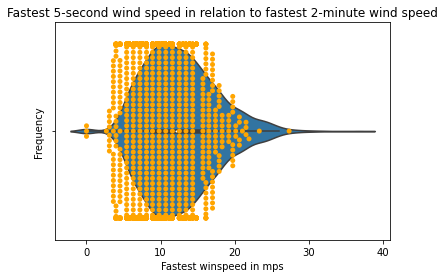

In [220]:
sns.violinplot(df['Fastest 5-second wind speed mps'])
sns.swarmplot(df['Fastest 2-minute wind speed mps'], color='orange')
plt.title('Fastest 5-second wind speed in relation to fastest 2-minute wind speed')
plt.ylabel('Frequency')
plt.xlabel('Fastest winspeed in mps')
plt.show()

This combination between a violinplot and swarmplot shows the fastest 5-second wind speed (violin) opposed to the fastest 2-minute windspeed, both in meters per second. As can be seen the violinplot shows more extreme results when it comes to the speed of wind in relation to the swarmplot. The reason for this is that the measure time for the fastest 2-second wind speed is a lot shorter, which allows it to be more sensitive for fast, but also slow winds.

C:\Users\noahk\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


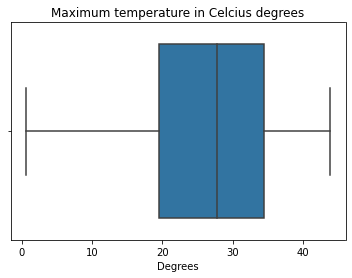

In [221]:
sns.boxplot(df['Maximum temperature Celcius'])
plt.title('Maximum temperature in Celcius degrees')
plt.xlabel('Degrees')
plt.show()

This boxplot shows the variable 'Maximum temperature'. The plot shows that the median is at 27 degrees Celcius. The 25th percentile, or Q1 is at 20 degrees Celcius and  the 75th percentile, or Q3 is at 34 degrees Celcius.

Text(0.5, 1.0, 'Average temperature in Celcius degrees by frequency in days')

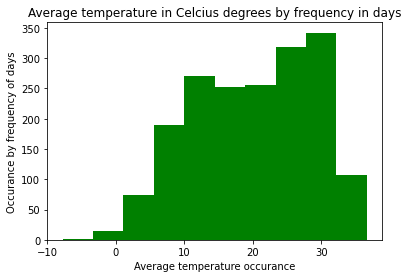

In [222]:
plt.hist(df['Average temperature Celcius'], color='green')
plt.xlabel('Average temperature occurance')
plt.ylabel('Occurance by frequency of days')
plt.title('Average temperature in Celcius degrees by frequency in days')

This graph shows a barplot of the variable 'Average temperature Celcius'. The graph shows some normality towards 30 degrees Celcius, as the bars are mostly getting higher gradually. 

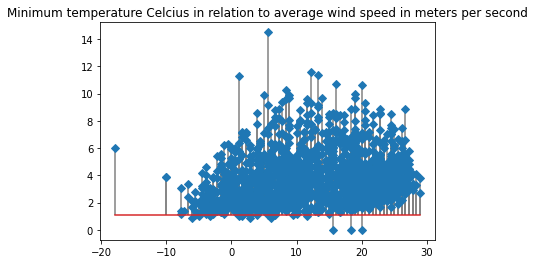

In [223]:
x = df['Minimum temperature Celcius']
y = df['Average wind speed mps']

plt.title('Minimum temperature Celcius in relation to average wind speed in meters per second')
plt.stem(x, y, linefmt='grey', markerfmt='D', bottom=1.1, use_line_collection=True)
plt.show()

This plot shows the variable 'Minimum temperature Celcius' opposed to the variable 'Average wind speed mps'. As the graph shows there is a cluster ranging from about 8 degrees Celcius up until 30 degrees Celcius. The highest wind speed in meters per second was recorded at a registered minimum temperature prediction of 5 degrees Celcius.

### 4.2 Correlations with given variables

In [224]:
num = df[["Average wind speed mps", "Average temperature Celcius", "Direction of fastest 2-minute wind (Degrees)", "Fastest 5-second wind speed mps"]]
num.corr()

,Average wind speed mps,Average temperature Celcius,Direction of fastest 2-minute wind (Degrees),Fastest 5-second wind speed mps
Average wind speed mps,1.000000,0.162862,0.247884,0.783599
Average temperature Celcius,0.162862,1.000000,0.009258,0.275461
Direction of fastest 2-minute wind (Degrees),0.247884,0.009258,1.000000,0.263917
Fastest 5-second wind speed mps,0.783599,0.275461,0.263917,1.000000


I wanted to see if there were correlations between the selected variables: 'Average wind speed mps', 'Average temperature Celcius', 'Direction of fastest 2-minute wind (Degrees)', 'Fastest 5-second wind speed mps'. As shown in the graph, the variables do not correlate to each other. This can play a role in the accuraccy of the prediction model because this possibly means the variable 'Average temperature Celcius' does not change much if we split the dataset and train the remaining variables.

## 5. Model building

The reason I chose for a random forest classification model is because the model is considered to be rather accurate compared to other models when it comes to the size of my dataset. The main difference when comparing classification with regression, is that classification uses majority voting to calculate the output, while on the contrary, mean is calculated in regression (Valdarrama, S). When it comes to the variables. I am convinced of the fact that when observing the dataset, these variables prove to make the most impact on a predictive model in terms of usability. Reasons for this are that other variables did not contain enough data to work with and variables containing data in Fahrenheit and Miles per hour became obsolete after those variables had been converted to degrees Celcius and Meters per second.

In [225]:
X = df.loc[:,'Maximum temperature Celcius':'Week Day_Wednesday']
y = df['Average temperature Celcius'].astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=80)

In [226]:
rf = RandomForestClassifier(random_state=99, n_estimators=100)
rf = rf.fit(X_train, y_train)

In [227]:
rf.score(X_test,y_test)

0.2718978102189781

In [228]:
y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -7       0.00      0.00      0.00         1
           0       0.00      0.00      0.00         2
           1       0.00      0.00      0.00         3
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         6
           4       0.50      0.29      0.36         7
           5       0.50      0.25      0.33         8
           6       0.37      0.70      0.48        10
           7       0.31      0.26      0.29        19
           8       0.09      0.25      0.13        12
           9       0.50      0.08      0.14        12
          10       0.21      0.20      0.20        25
          11       0.30      0.19      0.24        31
          12       0.29      0.25      0.27        20
          13       0.24      0.36      0.29        11
          14       0.10      0.17      0.12         6
          15       0.45      0.31      0.37        16
          16       0.24    

C:\Users\noahk\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\noahk\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\noahk\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


As can be seen here the weighted average precision is 29% and the recall is 27%, whilst the accuracy for the f-1score also is 27%. These scores can not be considered to be that good

In [229]:
y_pred = rf.predict(X_test)
cm = confusion_matrix(y_test, y_pred) 
cm

array([[0, 0, 1, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 2, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

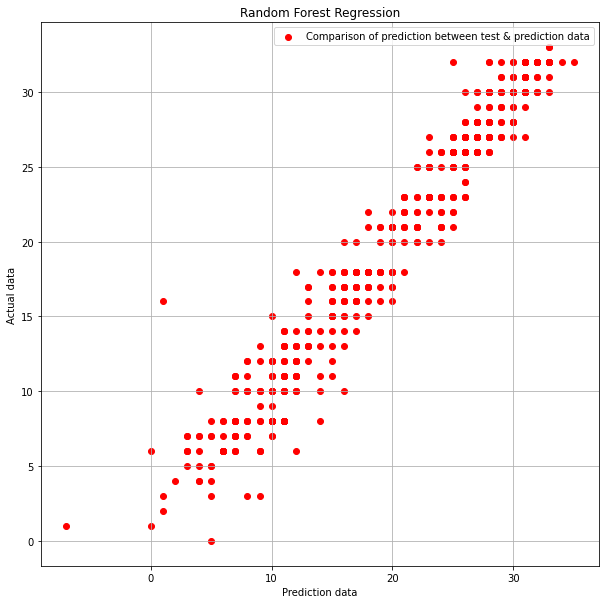

In [230]:
plt.figure(figsize= (10, 10))
plt.scatter(y_test, y_pred, color = 'red', label='Comparison of prediction between test & prediction data')
plt.legend()
plt.grid()
plt.title('Random Forest Regression')
plt.xlabel('Prediction data')
plt.ylabel('Actual data')
plt.show()

This scatterplot shows test data and predicted data. As shows, there are some outliers along the line, however generally speaking, this is a strong, positive and linear line.

### 6. Evaluation

In [231]:
mean_squared_error(y_test,y_pred)

4.031021897810219

I used a random forest classification model to predict the average temperature for the El Paso International Airport to give an insight in what they can expect in the future. As I had stated at the second part of my research, I first wanted to make a prediction for multiple zipcodes around the city of El Paso, Texas. Unfortunately due to the lack of finding the right data I was not able to do this. Therefore I continued by calculating the average temperature in celcius only for one zipcode. I made this prediction by taking the variable 'Average Temperature Celcius' as the independent variable. The accuracy of the model was not that high and as has been stated earlier, it is very likely that this is because of the small number of variables. Also the variables I had shown earlier did not correlate to the variable 'Average temperature Celcius'. This also could play a role in the acuraccy of the model. The mean squared error values describe the model's performance. For this particular model, the mean squared error is 4.03. This score can be considered high as the closer it gets to 0.0, the better the score is (Rowe, W). 4.0 is very close to 0.0, which means that almost all predicted values matched the expected values exactly. This means that in relation to the test data, the predicted data performs at a high success rate.

## 7. APA Documentation
Vox Youtube. (n.d.). Vox - How America's hottest city is trying to cool down. https://www.youtube.com/watch?v=ZQ6fSHr5TJg&list=LL&index=19&t=4s&ab_channel=Vox \
NCDC Dataset. (n.d.). NCDC. https://www.ncdc.noaa.gov/cdo-web/confirmation \
NCDC Codes. (n.d.). NCDC. https://www.ncei.noaa.gov/data/daily-summaries/doc/GHCND_documentation.pdf \
Roooommmmelllll. (Mar 14, 2014). Python codes. https://github.com/Roooommmmelllll/Python-Codes/blob/master/MPH%20Conversions.py
Valdarrama, S. (Jul 13, 2021). Considerations when choosing a machine learning model. https://towardsdatascience.com/considerations-when-choosing-a-machine-learning-model-aa31f52c27f3 \
Rowe, W. (July 5, 2018). Mean Square Error & R2 Score Clearly Explained. https://www.bmc.com/blogs/mean-squared-error-r2-and-variance-in-regression-analysis/